# 0. INTRO

There are two separate target columns to predict, each in dataset 1 and dataset 2.

This notebook is about dataset 2

# 1. GETTING READY

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

In [2]:
# pip install fast_ml

In [3]:
#import dataset
df = pd.read_csv("../data/dataset_2.csv")

# 2. DATASET INTRO

In [4]:
# first five rows
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
# shape
df.shape

(50000, 109)

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 109 entries, var_1 to var_109
dtypes: float64(108), int64(1)
memory usage: 41.6 MB


In [7]:
# desc
df.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,...,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,4.704039e+00,6.880031e+00,1.151436e+01,3.892582e+00,2.048636e+00,1.848628e+00,2.370612e+00,7.121850e-01,11.721513,1.032379,...,2.327994e+00,6.858550e+00,3.628993e+00,16.968881,15.120146,6.975261e+00,1.550717e+00,1.660071e+00,1.804478e+00,2.296217e+00
std,1.720424e+00,2.389773e+00,6.596539e+00,6.781865e-01,8.710676e-01,1.208759e+00,5.679278e-01,5.351923e-01,2.243756,2.150870,...,7.719772e-01,9.886623e-01,1.127913e+00,1.221648,1.856647,1.219799e+00,5.428825e-01,1.075348e+00,1.339689e+00,1.342662e+00
min,-9.783926e-07,-3.471477e-07,-9.814835e-07,-7.494901e-07,4.039061e-07,-9.627684e-07,-6.249937e-07,-9.920742e-07,0.528386,0.000097,...,-9.383139e-07,-3.400396e-07,-8.295591e-07,1.440938,1.380481,7.369675e-07,-9.452659e-07,-9.775950e-07,-9.578620e-07,-5.863368e-07
25%,3.677419e+00,5.349017e+00,5.420063e+00,3.469558e+00,1.461370e+00,1.063076e+00,2.000001e+00,3.888885e-01,10.268114,0.052340,...,1.812357e+00,6.231875e+00,2.927124e+00,16.396500,14.264012,6.196721e+00,1.204462e+00,9.677421e-01,1.008315e+00,1.544505e+00
50%,4.704951e+00,6.825840e+00,1.376047e+01,3.873594e+00,1.878110e+00,1.496775e+00,2.339303e+00,6.187497e-01,11.918214,0.231792,...,2.226308e+00,6.869970e+00,3.428033e+00,17.138207,15.468750,7.025433e+00,1.483185e+00,1.516666e+00,1.273522e+00,2.068721e+00
75%,5.682472e+00,8.268947e+00,1.742553e+01,4.289362e+00,2.426291e+00,2.236870e+00,2.712021e+00,9.090915e-01,13.350909,0.970598,...,2.725638e+00,7.490974e+00,4.103208e+00,17.784080,16.387197,7.798224e+00,1.812842e+00,2.171428e+00,2.079650e+00,2.679764e+00
max,2.000000e+01,1.938533e+01,2.000000e+01,2.000000e+01,1.216985e+01,1.980000e+01,1.960000e+01,2.000000e+01,19.816311,20.000001,...,1.254920e+01,1.940000e+01,1.900000e+01,20.000001,19.999999,1.511078e+01,1.300635e+01,1.880000e+01,1.816324e+01,2.000000e+01


In [8]:
# hist - doesn't really work there, too much charts to render

# df.hist(bins = 40, figsize=(18, 12))
# 
# plt.show()

# 3. SPLITTING

In [9]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

In [10]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [11]:
print(X.shape)
X.head()

(50000, 108)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [12]:
print(X_train.shape)
X_train.head()

(35000, 108)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
39971,2.509090,7.893144,18.502970,3.961110,1.053666,0.821888,3.847407,0.560377,6.730448,0.110042,...,1.220657,6.061481,2.117630,17.587445,14.831253,4.819629,0.722222,2.481818e+00,1.543982,1.700378
10180,4.175824,3.365950,16.016683,4.673909,3.533790,0.782975,3.465504,0.559267,11.110632,0.310642,...,0.893954,6.478984,2.802376,17.536970,16.993644,6.305711,0.576328,2.857143e+00,2.916411,8.445230
6638,4.947368,6.282385,0.119975,3.380282,1.924558,2.275201,2.018162,1.845818,11.603626,0.584831,...,1.411744,8.095182,4.521427,16.871051,15.278728,8.689104,1.197220,3.000001e+00,1.265207,1.593261
26245,3.733334,4.932983,19.525001,3.754092,1.700798,1.092000,3.109898,0.613333,6.134976,0.065520,...,2.374871,5.326657,2.393623,16.562366,15.360954,5.064225,1.258807,2.177778e+00,3.066521,2.364371
12520,9.800001,3.537388,18.092715,4.378261,1.507614,1.205128,2.797826,0.439744,16.701701,0.019037,...,2.520678,7.179131,3.250044,17.208152,14.606715,7.003044,1.115217,7.248120e-07,3.781182,2.522660


In [13]:
print(X_test.shape)
X_test.head()

(10500, 108)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
41894,2.375510,5.931489,4.816238,3.063515,2.217678,3.515356,1.874615,0.647191,7.951144,0.025235,...,2.199869,5.849537,3.541650,18.176434,15.459239,5.590956,1.970813,1.224489e+00,0.483151,2.091428
24436,5.930636,3.282999,13.706224,3.805828,1.937206,1.716449,2.255676,0.759791,10.996493,0.085364,...,2.537815,6.602126,3.326880,18.036187,15.935012,7.090953,1.598998,1.630058e+00,1.226478,2.416558
33364,5.008695,5.156008,17.618644,3.351130,2.176032,3.912882,2.466529,1.708474,11.509948,0.122983,...,3.092104,6.983572,3.261239,15.722893,15.571119,6.838604,1.774127,7.752497e-07,1.995623,4.661002
6248,4.795744,9.336624,1.105381,2.803556,1.382515,3.525424,1.541866,1.233898,13.442040,0.240046,...,1.910569,7.173333,3.887896,17.052261,14.153205,6.422578,1.241599,1.742553e+00,1.018162,1.152716
1082,3.214201,4.976659,0.159586,3.598500,3.638916,2.624470,2.017909,0.922352,15.923807,1.560936,...,1.789647,9.584006,5.151917,16.994040,15.096860,9.288129,1.874220,1.320709e+00,1.291029,2.624157


In [14]:
print(X_val.shape)
X_val.head()

(4500, 108)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
44819,4.987501,4.767731,16.601765,4.114578,1.645999,1.116997,2.751579,0.493297,10.551549,0.116239,...,1.900784,6.324073,2.839574,16.811847,16.273995,6.502728,1.156328,1.642857,1.449452,2.347777
9052,7.279413,8.499732,9.880859,3.847818,2.098258,1.523201,2.297151,0.448000,11.171422,0.237722,...,3.099315,6.163505,3.584483,16.252020,15.179042,6.889289,1.840677,1.105882,0.478118,1.356264
25834,6.129031,7.967772,16.880177,3.686969,1.192741,1.292210,2.475921,0.581053,8.991065,0.013541,...,2.876574,5.336261,2.505353,16.981697,15.253464,6.430595,1.655100,1.780645,3.119474,1.942556
26843,3.741294,10.829881,18.110995,1.778379,1.378375,0.854789,1.016217,0.388864,12.620398,2.120740,...,1.593859,6.486487,3.151595,16.316429,14.032857,7.445947,1.179730,1.512437,0.514661,0.732140
47067,1.855340,4.368231,19.735504,3.570600,1.603071,1.059048,2.139022,0.452382,14.189497,3.057703,...,1.672247,6.621192,2.933137,17.833721,16.742917,6.142453,1.570043,1.071845,1.007877,2.493256


In [15]:
print(y.shape)
y.head()

(50000,)


0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [16]:
print(y_train.shape)
y_train.head()

(35000,)


39971    1
10180    1
6638     1
26245    1
12520    0
Name: target, dtype: int64

In [17]:
print(y_test.shape)
y_test.head()

(10500,)


41894    1
24436    0
33364    0
6248     0
1082     0
Name: target, dtype: int64

In [18]:
print(y_val.shape)
y_val.head()

(4500,)


44819    1
9052     0
25834    1
26843    1
47067    1
Name: target, dtype: int64

In [19]:
# exporting
relative_path = "./validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv('validation/X_train_dataset_2.csv', encoding='utf-8')
X_test.to_csv('validation/X_test_dataset_2.csv', encoding='utf-8')
X_val.to_csv('validation/X_val_dataset_2.csv', encoding='utf-8')

y_train.to_csv('validation/y_train_dataset_2.csv', encoding='utf-8')
y_test.to_csv('validation/y_test_dataset_2.csv', encoding='utf-8')
y_val.to_csv('validation/y_val_dataset_2.csv', encoding='utf-8')

In [20]:
# merging sets back for preprocessing purposes
train = X_train.join(y_train)
test = X_test.join(y_test)
val = X_val.join(y_val)

# 4. CLEANING DATA

In [21]:
# looking for duplicate features
duplicate_features = get_duplicate_features(train)

print(duplicate_features.shape)
duplicate_features.head(10)

(0, 3)


,Desc,feature1,feature2


In [22]:
# what are types of duplicates
duplicate_features['Desc'].unique()

array([], dtype=object)

In [23]:
# flatten dataframe with duplicate features to list
duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features)

[]


In [24]:
# drop duplicate features and show difference
print('train shape before dropping duplicates: ', train.shape)
train.drop(columns = duplicate_features, inplace=True)
print('train shape after dropping duplicates: ', train.shape)

train shape before dropping duplicates:  (35000, 109)
train shape after dropping duplicates:  (35000, 109)


In [25]:
# looking for constant features
constant_features = get_constant_features(train)

print(constant_features.shape)
constant_features.head(10)

(0, 4)


,Desc,Var,Value,Perc


In [26]:
# what are types of constant features
constant_features['Desc'].unique()

array([], dtype=object)

In [27]:
# flatten dataframe with constant columns to list
constant_features = constant_features[constant_features['Perc'] > 99]['Var'].tolist()
print(constant_features)

[]


In [28]:
# drop constant features and show difference
print('train shape before dropping constant features: ', train.shape)
train.drop(columns = constant_features, inplace=True)
print('train shape after dropping constant features: ', train.shape)

train shape before dropping constant features:  (35000, 109)
train shape after dropping constant features:  (35000, 109)


In [29]:
# getting correlation matrix
corr = train.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [30]:
# looking for highly correlated features
corr_features = pd.Series([col for col in upper_triangle if any(upper_triangle[col] * 100 > 95)])

print(corr_features.shape)
corr_features.head()

(12,)


0    var_24
1    var_32
2    var_43
3    var_57
4    var_59
dtype: object

In [31]:
# drop highly correlated features and show difference
print('train shape before dropping highly correlated features: ', train.shape)
train.drop(columns = corr_features, inplace=True)
print('train shape after dropping highly correlated features: ', train.shape)

train shape before dropping highly correlated features:  (35000, 109)
train shape after dropping highly correlated features:  (35000, 97)


In [32]:
# how dataset looks now?
train.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,target
39971,2.509090,7.893144,18.502970,3.961110,1.053666,0.821888,3.847407,0.560377,6.730448,0.110042,...,1.220657,6.061481,2.117630,17.587445,14.831253,4.819629,0.722222,2.481818e+00,1.543982,1
10180,4.175824,3.365950,16.016683,4.673909,3.533790,0.782975,3.465504,0.559267,11.110632,0.310642,...,0.893954,6.478984,2.802376,17.536970,16.993644,6.305711,0.576328,2.857143e+00,2.916411,1
6638,4.947368,6.282385,0.119975,3.380282,1.924558,2.275201,2.018162,1.845818,11.603626,0.584831,...,1.411744,8.095182,4.521427,16.871051,15.278728,8.689104,1.197220,3.000001e+00,1.265207,1
26245,3.733334,4.932983,19.525001,3.754092,1.700798,1.092000,3.109898,0.613333,6.134976,0.065520,...,2.374871,5.326657,2.393623,16.562366,15.360954,5.064225,1.258807,2.177778e+00,3.066521,1
12520,9.800001,3.537388,18.092715,4.378261,1.507614,1.205128,2.797826,0.439744,16.701701,0.019037,...,2.520678,7.179131,3.250044,17.208152,14.606715,7.003044,1.115217,7.248120e-07,3.781182,0


<AxesSubplot:>

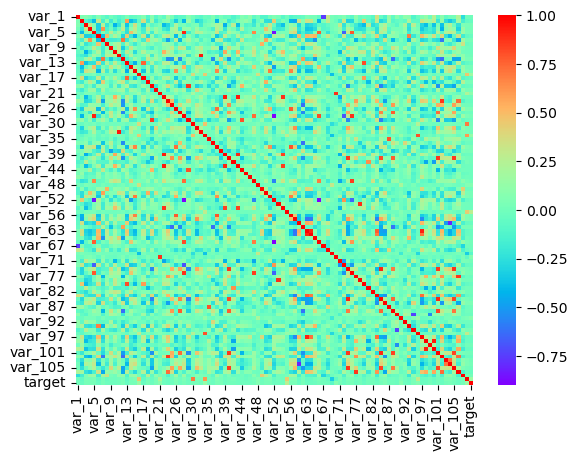

In [33]:
# lets take a look at correlation matrix once more
corr = train.corr(method="spearman")

sb.heatmap(corr, cmap="rainbow")

In [34]:
# exporting preprocessed dataset to csv
relative_path = "./preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
train.to_csv('preprocessed/train_dataset_2.csv', encoding='utf-8')